Train on 992 samples, validate on 248 samples
Epoch 1/50
992/992 [==============================] - 27s 27ms/step - loss: 0.7546 - acc: 0.6895 - val_loss: 0.8178 - val_acc: 0.7016

Epoch 00001: val_acc improved from -inf to 0.70161, saving model to wight_cnn_model_kaggel-4_std.h5
Epoch 2/50
992/992 [==============================] - 26s 26ms/step - loss: 0.7319 - acc: 0.6946 - val_loss: 0.9458 - val_acc: 0.6331

Epoch 00002: val_acc did not improve from 0.70161
Epoch 3/50
992/992 [==============================] - 26s 26ms/step - loss: 0.7508 - acc: 0.6815 - val_loss: 0.8377 - val_acc: 0.6694

Epoch 00003: val_acc did not improve from 0.70161
Epoch 4/50
992/992 [==============================] - 26s 26ms/step - loss: 0.7429 - acc: 0.6855 - val_loss: 0.9606 - val_acc: 0.6210

Epoch 00004: val_acc did not improve from 0.70161
Epoch 5/50
992/992 [==============================] - 26s 26ms/step - loss: 0.7105 - acc: 0.6925 - val_loss: 0.8628 - val_acc: 0.6573

Epoch 00005: val_acc did not 

992/992 [==============================] - 25s 26ms/step - loss: 0.6089 - acc: 0.7550 - val_loss: 0.8787 - val_acc: 0.6694

Epoch 00044: val_acc did not improve from 0.70565
Epoch 45/50
992/992 [==============================] - 25s 26ms/step - loss: 0.6252 - acc: 0.7611 - val_loss: 0.9374 - val_acc: 0.6573

Epoch 00045: val_acc did not improve from 0.70565
Epoch 46/50
992/992 [==============================] - 25s 26ms/step - loss: 0.7327 - acc: 0.7208 - val_loss: 0.9924 - val_acc: 0.6290

Epoch 00046: val_acc did not improve from 0.70565
Epoch 47/50
992/992 [==============================] - 25s 26ms/step - loss: 0.6873 - acc: 0.7460 - val_loss: 1.0450 - val_acc: 0.6089

Epoch 00047: val_acc did not improve from 0.70565
Epoch 48/50
992/992 [==============================] - 25s 26ms/step - loss: 0.6367 - acc: 0.7500 - val_loss: 0.9767 - val_acc: 0.6774

Epoch 00048: val_acc did not improve from 0.70565
Epoch 49/50
992/992 [==============================] - 25s 26ms/step - loss: 0.663

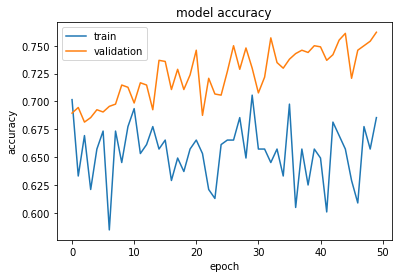

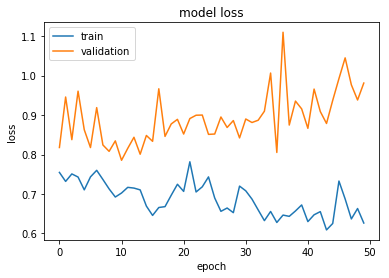

{0: 0.9222033898305084}
{0: 0.9222033898305084, 1: 0.9148155004319388}
{0: 0.9222033898305084, 1: 0.9148155004319388, 2: 0.9078525641025641}


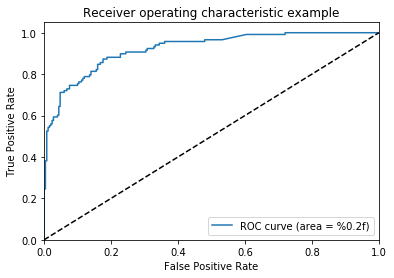

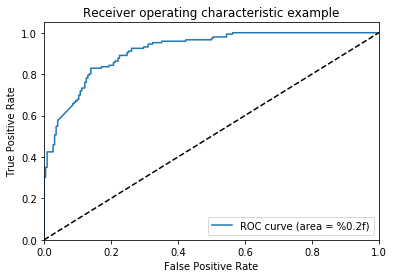

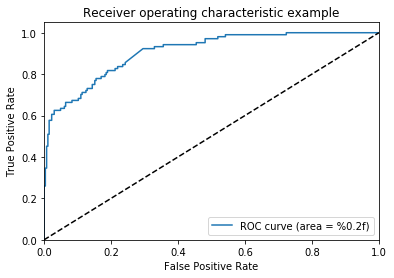

In [11]:
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED']='0'
#setting the seed nupy generator random number
np.random.seed(12)
#setting the seed for python random numbers
rn.seed(13)
#setting the seed for tensorflow
tf.set_random_seed(14)
from keras import backend as k

#force tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.set_session(sess)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time




pickle_in = open("X_k.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_k.pickle","rb")
y = pickle.load(pickle_in)

pickle_in = open("X_testk.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_testk.pickle","rb")
y_test = pickle.load(pickle_in)




# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
y_test= keras.utils.to_categorical(y_test, num_classes=3)



reg=keras.regularizers.l2(0.0005)
#reg=keras.regularizers.l1_l2(l1=0.005, l2=0.005)
#reg=None


model = Sequential()

model.add(Conv2D(560, (3, 3), activation ='relu', input_shape=(200, 200, 3), kernel_regularizer=reg, 
                 bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(280, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(140, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Conv2D(70, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation ='relu'))

model.add(Dropout(0.4))
model.add(Dense(3, activation ='softmax'))


model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
model.load_weights('wight_cnn_model_kaggel-3_std.h5')
#weights_cnn_model2_7.h5(kaggel)91test-train:(
#weights_cnn_model2_ph2_20%val.h5(94%acc)
#wight_cnn_model2_ph2_20%val989)
#wight_cnn_model_kaggel-2.h5

cb= ModelCheckpoint(filepath='wight_cnn_model_kaggel-4_std.h5',  verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)

history=model.fit(X, 
                  one_hot_labels,
                  batch_size=10,
                  epochs=50,
                  validation_split=0.2,
                  shuffle=True,
                  callbacks=[cb]
                     )



score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)

#score,acc=model.evaluate(X)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()


confusion matrix of : 
[[ 73  27  18]
 [  5 126  15]
 [  4  24  76]]
 confusion matrix, without normalized
[[ 73  27  18]
 [  5 126  15]
 [  4  24  76]]


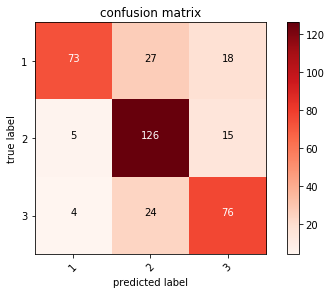

In [12]:
# create the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("confusion matrix of : ")
print(cm)

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Reds):
    # this funcation print & plots confusion matrix
    # normalize can be applied by  normalize=True,
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print(" confusion matrix, without normalized")
    print(cm)
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

    '''input to confusion_matrix must be a list of predictions, not OHEs (one hot encodings). 
    Call argmax on your y_test and y_pred, and you should get what you expect.'''

from sklearn.utils.multiclass import unique_labels
classes = [1,2,3]
plot_confusion_matrix(cm,classes)
